# WeatherPy #

### Analysis ###
From the graphs we can conclude that the temperature does increase the closer a city is to the equator. As a city's latitude approaches 0, the temperature increases.

The other weather conditions that were looked at: humidity, cloudiness, and windspeed, do not appear to be affected by their latitude.

In [2]:
!pip install citipy

  Using cached kdtree-0.16-py2.py3-none-any.whl


In [18]:
# Dependencies
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import numpy as np
import json
import seaborn as sns

In [19]:
# generate random lat and long
ran_lat = np.random.randint(-90, 90, size=800)
ran_lon = np.random.randint(-180, 180, size=800)

# create dataframe to hold the goods
latlon_df = pd.DataFrame({'Lat':ran_lat, 'Lon':ran_lon}).astype(float)
latlon_df["City"] = ""
latlon_df["Country Code"] = ""
latlon_df["Temperature (F)"] = ""
latlon_df["Humidity (%)"] = ""
latlon_df["Cloudiness (%)"] = ""
latlon_df["Windspeed (mph)"] = ""

#latlon_df.head()

### Generate Cities List ###

In [20]:
# find closest cities to random lat and lon
for index, row in latlon_df.iterrows():
    latlon_df.at[index, 'City'] = citipy.nearest_city(row["Lat"], row["Lon"]).city_name
    latlon_df.at[index, 'Country Code'] = citipy.nearest_city(row["Lat"], row["Lon"]).country_code

#latlon_df.head()

In [21]:
# Save config information
import config

api_key = config.key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

### Perform API Calls ###

In [22]:
template = "# {:^10}|{:^20}|{:^70}#"
header = template.format("wid", "city", "url (http://api.openweathermap.org/data/2.5/)")

# go through rows and define cities and countries
for index, row in latlon_df.iterrows():
    city_name = row["City"].replace(" ","+")
    country_code = row["Country Code"]
    
    # create query url using the city_name and country_code
    target_url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + api_key + "&units=" + units + "&q=" + city_name + "," + country_code
    
    #print(target_url)
    try: 
        resp = req.get(target_url)
    except:
        continue
        
    cities_lat_lon = resp.json()
    
# retrieve data for each column using try and except in case the city does not have weather tracking
    try:
        latlon_df.at[index, "Temperature (F)"] = cities_lat_lon["main"]["temp"]
        latlon_df.at[index, "Humidity (%)"] = cities_lat_lon["main"]["humidity"]
        latlon_df.at[index, "Cloudiness (%)"] = cities_lat_lon["clouds"]["all"]
        latlon_df.at[index, "Windspeed (mph)"] = cities_lat_lon["wind"]["speed"]
    
    except:
        #print("Missing field... skipping.")
        latlon_df.at[index, "Temperature (F)"] = "NaN"
        latlon_df.at[index, "Humidity (%)"] = "NaN"
        latlon_df.at[index, "Cloudiness (%)"] = "NaN"
        latlon_df.at[index, "Windspeed (mph)"] = "NaN"
        
        latlon_df = latlon_df[~latlon_df['Temperature (F)'].isin(['NaN'])]

# cities and urls
    try:
        print(header)
        print("".join(["-" for i in range(110)]))
        print(template.format(cities_lat_lon["id"], cities_lat_lon["name"], target_url))
    except KeyError:
        print("City does not have weather tracked.")
        
latlon_df.drop_duplicates(subset=["City", "Country Code",])
        
latlon_df.head()
        


#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3370903  |     Jamestown      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=jamestown,sh#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  6316343  |   Alta Floresta    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=alta+floresta,br#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2110227  |     Butaritari     |http://ap

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2248777  |     Marsassoum     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=marsassoum,sn#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4556050  |      Woodward      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=woodward,us#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2077963  |       Albany       |http://api.op

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1516048  |        Hovd        |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=hovd,mn#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3572627  |   Cockburn Town    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=cockburn+town,bs#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1572151  |     Nha Trang      |http://api.ope

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3833367  |      Ushuaia       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=ushuaia,ar#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3874787  |    Punta Arenas    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=punta+arenas,cl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3418910  |     Upernavik      |http://api.o

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  6063191  |     Mackenzie      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=mackenzie,ca#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   964420  |   Port Elizabeth   |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=port+elizabeth,za#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4030556  |      Rikitea       |http://a

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2276492  |       Harper       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=harper,lr#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3369157  |     Cape Town      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=cape+town,za#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4030556  |      Rikitea       |http://api.openw

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1507390  |       Dikson       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=dikson,ru#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   241131  |      Victoria      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=victoria,sc#
#    wid    |  

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1524298  |        Aksu        |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=aksu,kz#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3573197  |      Hamilton      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=hamilton,bm#
#    wid    |    

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2155415  |    New Norfolk     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=new+norfolk,au#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3401148  |      Cururupu      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=cururupu,br#
#    wid  

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3874787  |    Punta Arenas    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=punta+arenas,cl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3381428  |      Iracoubo      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=iracoubo,gf#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2396518  |    Port-Gentil     |http://api.

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   777073  |       Vadso        |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=vadso,no#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1015776  |     Bredasdorp     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=bredasdorp,za#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2110227  |     Butaritari     |http://api.openw

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   380348  |     Abu Zabad      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=abu+zabad,sd#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3421719  |       Narsaq       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=narsaq,gl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4030556  |      Rikitea       |http://api.openw

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4030556  |      Rikitea       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=rikitea,pf#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  6541900  |   Villa Literno    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=villa+literno,it#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3874787  |    Punta Arenas    |http://api.

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1337612  |     Dhidhdhoo      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=dhidhdhoo,mv#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3652567  |   San Cristobal    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=san+cristobal,ec#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1182872  |        Bhag        |http://ap

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2063042  |    Port Hedland    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=port+hedland,au#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   935215  |   Saint-Philippe   |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=saint-philippe,re#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2075265  |     Busselton      |http:

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3372707  |   Ribeira Grande   |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=ribeira+grande,pt#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2112802  |       Hasaki       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=hasaki,jp#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3369157  |     Cape Town      |http://api.

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3843123  |      Neuquen       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=neuquen,ar#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4030556  |      Rikitea       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=rikitea,pf#
#    wid    |  

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3361934  |      Saldanha      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=saldanha,za#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2017155  |     Saskylakh      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=saskylakh,ru#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2614172  |       Saeby        |http://api.ope

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1015776  |     Bredasdorp     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=bredasdorp,za#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   964432  |    Port Alfred     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=port+alfred,za#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   525426  |      Sobolevo      |http://api

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1015776  |     Bredasdorp     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=bredasdorp,za#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3430443  |      Necochea      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=necochea,ar#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3894426  |     Coihaique      |http://api.op

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  5924351  |    Clyde River     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=clyde+river,ca#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2630299  |        Hofn        |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=hofn,is#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2411397  |     Georgetown     |http://api.openw

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1159384  |       Taybad       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=taybad,ir#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3696183  |      Iquitos       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=iquitos,pe#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#   540761  |     Kropotkin      |http://api.openwea

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2022572  |      Khatanga      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=khatanga,ru#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3874787  |    Punta Arenas    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=punta+arenas,cl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2075265  |     Busselton      |http://api.

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3418910  |     Upernavik      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=upernavik,gl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  5993072  |      Kitimat       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=kitimat,ca#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2077963  |       Albany       |http://api.open

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4035715  |       Avarua       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=avarua,ck#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3466165  |      Cidreira      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=cidreira,br#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid    |  

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4031742  |     Egvekinot      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=egvekinot,ru#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4252975  |       Barrow       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=barrow,us#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4020109  |       Atuona       |http://api.openw

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
City does not have weather tracked.
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  6170031  |    Tuktoyaktuk     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=tuktoyaktuk,ca#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
------------------

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3366880  |      Hermanus      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=hermanus,za#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3081419  |      Wolsztyn      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=wolsztyn,pl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2126199  |      Cherskiy      |http://api.open

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3874787  |    Punta Arenas    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=punta+arenas,cl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3883457  |        Lebu        |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=lebu,cl#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3421719  |       Narsaq       |http://api.open

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2621449  |      Gistrup       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=gistrup,dk#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2181625  |      Te Anau       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=te+anau,nz#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3863379  |   Mar del Plata    |http://api.openwe

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  4011743  |    Constitucion    |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=constitucion,mx#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3359736  |     Vredendal      |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=vredendal,za#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3139597  |     Sistranda      |http://api

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  5924351  |    Clyde River     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=clyde+river,ca#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  2264923  |      Peniche       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=peniche,pt#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1802276  |      Longyan       |http://api.op

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  3359638  |     Walvis Bay     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=walvis+bay,na#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  5882953  |      Aklavik       |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=aklavik,ca#
#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  1798473  |        Puqi        |http://api.ope

#    wid    |        city        |            url (http://api.openweathermap.org/data/2.5/)             #
--------------------------------------------------------------------------------------------------------------
#  6170031  |    Tuktoyaktuk     |http://api.openweathermap.org/data/2.5/weather?appid=4eaf5a97d657efce15237d1ddca8220b&units=imperial&q=tuktoyaktuk,ca#


,Lat,Lon,City,Country Code,Temperature (F),Humidity (%),Cloudiness (%),Windspeed (mph)
0,-29.0,-5.0,jamestown,sh,74.71,100,92,14
1,-10.0,-56.0,alta floresta,br,77.41,88,80,2.71
2,27.0,178.0,butaritari,ki,82.54,100,12,14.23
3,-29.0,-5.0,jamestown,sh,74.71,100,92,14
4,-48.0,89.0,busselton,au,66.25,100,80,19.82


### Temperature (F) vs. Latitude ###

In [45]:
latlon_df['Temperature (F)'].replace('', np.nan, inplace=True)
latlon_df.dropna(subset=['Temperature (F)'], inplace=True)

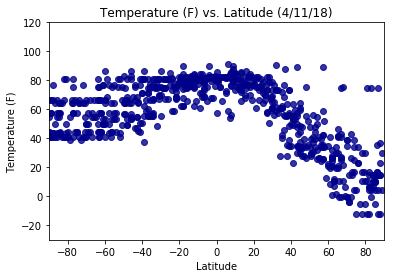

In [55]:
# scatter plot of Temperature (F) vs. Latitude
#plt.scatter(latlon_df["Temperature (F)"], latlon_df["Lat"], marker="o", facecolors="red", edgecolors="black")

sns.regplot(x=latlon_df["Lat"], y=latlon_df["Temperature (F)"], fit_reg=False, color="darkblue")

# setting axis limits
plt.ylim(-30,120)
plt.xlim(-90,90)

# creating labels
plt.title("Temperature (F) vs. Latitude (4/11/18)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("Temp_Lat.png")
plt.show()



### Humidity (%) vs. Latitude ###

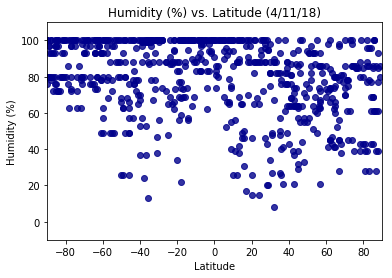

In [51]:
# scatter plot of Humidity (%) vs. Latitude
sns.regplot(x=latlon_df["Lat"], y=latlon_df["Humidity (%)"], fit_reg=False, color="darkblue")

# setting axis limits
plt.ylim(-10,110)
plt.xlim(-90,90)

# creating labels
plt.title("Humidity (%) vs. Latitude (4/11/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Hum_Lat.png")
plt.show()

### Cloudiness (%) vs. Latitude ###

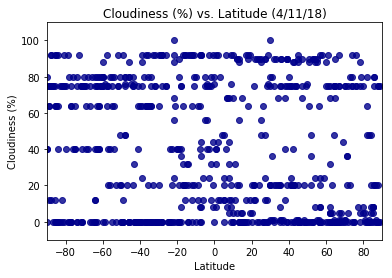

In [56]:
# scatter plot of Cloudiness (%) vs. Latitude
sns.regplot(x=latlon_df["Lat"], y=latlon_df["Cloudiness (%)"], fit_reg=False, color="darkblue")

# setting axis limits
plt.ylim(-10,110)
plt.xlim(-90,90)

# creating labels
plt.title("Cloudiness (%) vs. Latitude (4/11/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Cloud_Lat.png")
plt.show()

### Wind Speed (mph) vs. Latitude ###

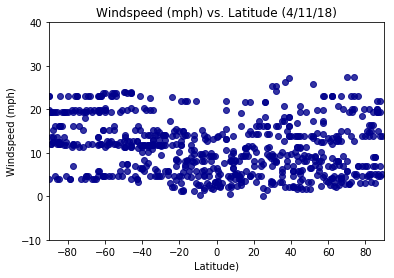

In [57]:
# scatter plot of Wind Speed (mph) vs. Latitude
sns.regplot(x=latlon_df["Lat"], y=latlon_df["Windspeed (mph)"], fit_reg=False, color="darkblue")

# setting axis limits
plt.ylim(-10, 40)
plt.xlim(-90, 90)

# creating labels
plt.title("Windspeed (mph) vs. Latitude (4/11/18)")
plt.xlabel("Latitude)")
plt.ylabel("Windspeed (mph)")

plt.savefig("Wind_Lat.png")
plt.show()

In [58]:
# export to csv
latlon_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)